### This notebook answers assignment part B question 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('pima-indians-diabetes1.csv')
raw_data.columns = ['pregnant number','pgc','dbp','sft','insulin','bmi','dpf','age','class']

In [3]:
print(raw_data.describe())
attributes = raw_data.iloc[:,:-1].values
labels = raw_data.iloc[:,-1].values
trainX, testX, trainY, testY  = train_test_split(attributes,labels,test_size=0.3,random_state=30,stratify=labels)

       pregnant number         pgc         dbp         sft     insulin  \
count       767.000000  767.000000  767.000000  767.000000  767.000000   
mean          3.842243  120.859192   69.101695   20.517601   79.903520   
std           3.370877   31.978468   19.368155   15.954059  115.283105   
min           0.000000    0.000000    0.000000    0.000000    0.000000   
25%           1.000000   99.000000   62.000000    0.000000    0.000000   
50%           3.000000  117.000000   72.000000   23.000000   32.000000   
75%           6.000000  140.000000   80.000000   32.000000  127.500000   
max          17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age       class  
count  767.000000  767.000000  767.000000  767.000000  
mean    31.990482    0.471674   33.219035    0.348110  
std      7.889091    0.331497   11.752296    0.476682  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243500   24.000000    0.000000

#### Q 2.1

In [4]:
classifier = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, random_state=30, solver='sgd')
classifier.fit(trainX,trainY)
predictions = classifier.predict(testX)

In [5]:
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       151
           1       0.55      0.53      0.54        80

    accuracy                           0.69       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231



#### Q 2.2

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150,solver='sgd',random_state=3)

N = trainX.shape[0]
EPOCH = 25
BATCH_SIZE = 64
CLASSES = np.unique(trainY)

scores_train = []
scores_test = []
mlploss = []

In [7]:
epoch = 0
while epoch < EPOCH:
#     print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(trainX.shape[0])
    
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + BATCH_SIZE]        
        mlp.partial_fit(trainX[indices], trainY[indices], classes=CLASSES)
        mini_batch_index += BATCH_SIZE

        if mini_batch_index >= N:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(trainX, trainY))
    
     # SCORE TEST
    scores_test.append(mlp.score(testX, testY))
    
    # compute loss
    
    mlploss.append(mlp.loss_)
    epoch += 1


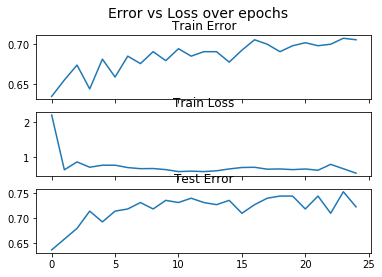

In [8]:
""" Plot """
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(scores_train)
ax[0].set_title('Train Error')
ax[1].plot(mlploss)
ax[1].set_title('Train Loss')
ax[2].plot(scores_test)
ax[2].set_title('Test Error')
fig.suptitle("Error vs Loss over epochs", fontsize=14)
plt.show()

#  explain why the trend?

#### Q 2.3

In [9]:
data = []
for i in range(1,20):
    mlp = MLPClassifier(hidden_layer_sizes=(20-i,i), max_iter=150, solver='sgd', random_state=30)
    mlp.fit(trainX,trainY)
    predictions = mlp.predict(testX)
    score = accuracy_score(testY,predictions)
    data.append({'Neurons':(20-i,i),'Accuracy':score})
pd.set_option('display.precision',20)
dataFrame = pd.DataFrame(data,columns=['Neurons','Accuracy'])
print(dataFrame.to_string(index=False))

/Users/vatsal/opt/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vatsal/opt/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vatsal/opt/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/vatsal/opt/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum

  Neurons                Accuracy
  (19, 1)  0.65367965367965363832
  (18, 2)  0.65367965367965363832
  (17, 3)  0.65800865800865804278
  (16, 4)  0.65367965367965363832
  (15, 5)  0.64069264069264064698
  (14, 6)  0.67965367965367962100
  (13, 7)  0.67532467532467532756
  (12, 8)  0.69264069264069261234
  (11, 9)  0.70129870129870131024
 (10, 10)  0.69696969696969701680
  (9, 11)  0.59307359307359308609
  (8, 12)  0.71861471861471859501
  (7, 13)  0.71428571428571430157
  (6, 14)  0.67965367965367962100
  (5, 15)  0.70562770562770560367
  (4, 16)  0.67532467532467532756
  (3, 17)  0.70129870129870131024
  (2, 18)  0.65367965367965363832
  (1, 19)  0.65367965367965363832


/Users/vatsal/opt/anaconda3/envs/DMML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Q 2.4 
explain why there is variation in accuracy

#### Q 2.5
Four suitable criteria for other datasets
<ol>
    <li>Number of features or attributes should be around 6</li>
    <li>Should be a binary classification problem</li>
    <li>Size of dataset should be around 750 to 800 samples</li>
    <li></li>
</ol>